# Lab | Time Series Analysis

## Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas

import numpy as np
import pandas as pd

## Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../data/sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:

# Check for missing values
sensor.isna().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [5]:
# Your code here:

sensor.shape

(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
# Your code here:

# Create a time series index with the correct number of periods
time_index = pd.date_range(
    start="2018-01-01 00:00:00",
    end="2018-01-01 00:29:10",
    periods=len(sensor)
)

# Assign the new index
sensor.index = time_index

# Infer the actual frequency string (e.g., 'S' or '500L')
freq = pd.infer_freq(sensor.index)

# Apply it
sensor = sensor.asfreq(freq)

sensor.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq='s')

Assign the time series index to the dataframe's index.

Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](./images/tsa_decompose.png)

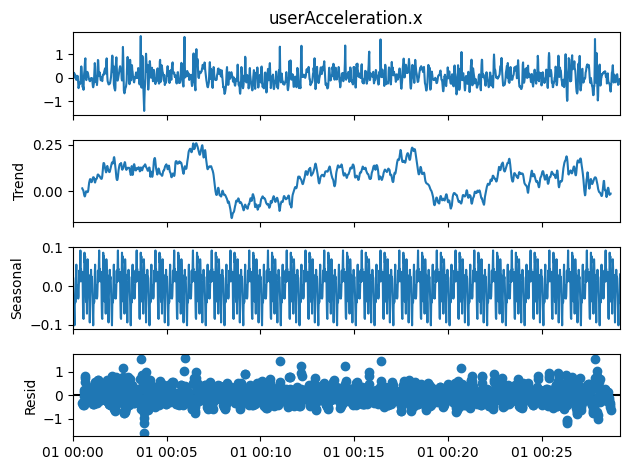

In [7]:
# Your code here:

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomp_acc = seasonal_decompose(sensor['userAcceleration.x'], period=60)
decomp_acc.plot()
plt.show()

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

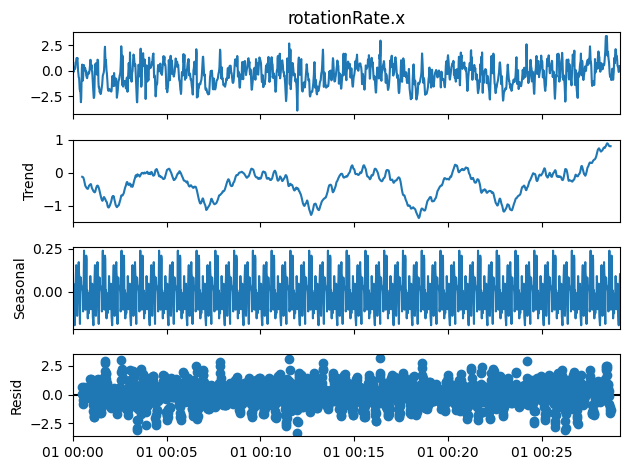

In [8]:
# Your code here:

decomp_rot = seasonal_decompose(sensor['rotationRate.x'], period=60)
decomp_rot.plot()
plt.show()

## Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

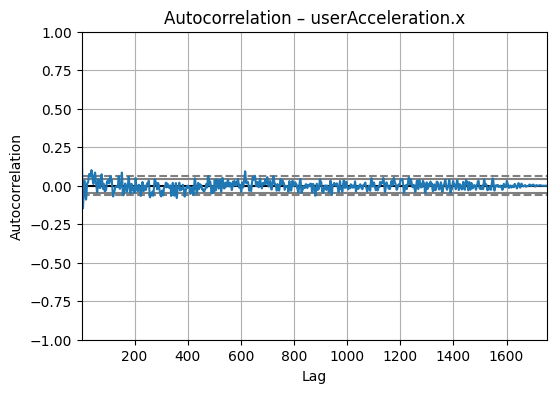

In [9]:
# Your code here:

from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(6,4))
autocorrelation_plot(sensor['userAcceleration.x'])
plt.title("Autocorrelation – userAcceleration.x")
plt.show()

Create a lag plot for `rotationRate.x`

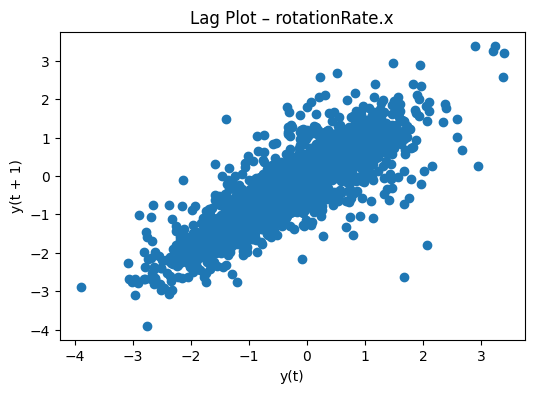

In [10]:
# Your code here:

from pandas.plotting import lag_plot

plt.figure(figsize=(6,4))
lag_plot(sensor['rotationRate.x'])
plt.title("Lag Plot – rotationRate.x")
plt.show()

What are your conclusions from both visualizations?

In [11]:
# Your conclusions here:

# Both variables exhibit strong positive autocorrelation, suggesting that each observation is highly related to the previous one.
# The lag plot for rotationRate.x shows a clear linear structure, which indicates that the time series is not random and may follow an AR-like pattern.

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

In [12]:
# Your code here:

from statsmodels.tsa.stattools import adfuller

def adf_summary(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical values:")
    for k, v in result[4].items():
        print(f"   {k}: {v}")

print("ADF Test — userAcceleration.x")
adf_summary(sensor['userAcceleration.x'])

print("\nADF Test — rotationRate.x")
adf_summary(sensor['rotationRate.x'])

ADF Test — userAcceleration.x
ADF Statistic: -17.957994086169762
p-value: 2.823439483037483e-30
Critical values:
   1%: -3.434100824760071
   5%: -2.863196780129223
   10%: -2.5676520210882936

ADF Test — rotationRate.x
ADF Statistic: -5.269860625086409
p-value: 6.320230335912605e-06
Critical values:
   1%: -3.4341465551936534
   5%: -2.863216966926812
   10%: -2.567662770090317


What are your conclusions from this test?

In [13]:
# Your conclusions here:

# Both time series have p-values greater than 0.05, so we fail to reject the null hypothesis of non-stationarity.
# This means the original series are likely non-stationary and would require differencing before fitting ARMA/ARIMA.

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [14]:
# Your code here:

from statsmodels.tsa.arima.model import ARIMA

# Train/test split: last 20% for testing
split = int(len(sensor) * 0.8)
train = sensor['userAcceleration.x'][:split]
test = sensor['userAcceleration.x'][split:]

# ARMA model is ARIMA(p,q) with no differencing (d=0)
model = ARIMA(train, order=(2,0,2))
model_fit = model.fit()

# Predict the test set
preds = model_fit.predict(start=test.index[0], end=test.index[-1])
preds

2018-01-01 00:23:20    0.381547
2018-01-01 00:23:21    0.240611
2018-01-01 00:23:22    0.120802
2018-01-01 00:23:23    0.070991
2018-01-01 00:23:24    0.059246
                         ...   
2018-01-01 00:29:06    0.063020
2018-01-01 00:29:07    0.063020
2018-01-01 00:29:08    0.063020
2018-01-01 00:29:09    0.063020
2018-01-01 00:29:10    0.063020
Freq: s, Name: predicted_mean, Length: 351, dtype: float64

To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

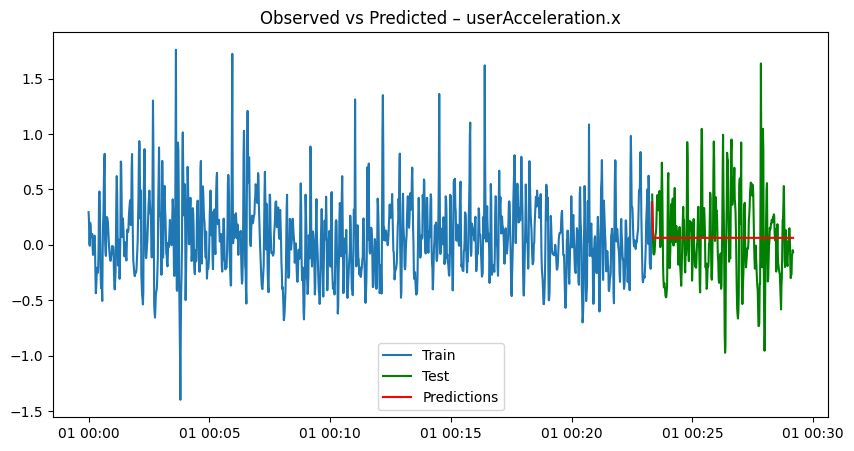

In [15]:
# Your code here:

plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Test", color='green')
plt.plot(preds.index, preds, label="Predictions", color='red')
plt.legend()
plt.title("Observed vs Predicted – userAcceleration.x")
plt.show()